In [12]:
import numpy as np
from numpy.random import f

import seaborn as sns

def spiral_mixer(sol1:np.ndarray, sol2:np.ndarray, sol3:np.ndarray) -> np.ndarray:
    """Calculates the concentrations of solutions at the outlets of the spiral mixer, given 3 inlet concentrations.
    Input: 3 Input solutions of 1D arrays of the same length, where each component describes a compounds concentration.
    Output: 2D array where each row describes the concentrations at one outlet of the mixer.
    """

    assert len(sol1) == len(sol2) == len(sol3), "All solutions must have the same number of components."
    assert np.shape(sol1)[1] == 1 if len(np.shape(sol1)) > 1 else True, "Solutions must be 1D arrays."     

    inlet_1 = np.array([*np.linspace(1, 0, 9), *[0]*8, *np.linspace(0, 1, 9)])
    inlet_2 = np.array([*np.linspace(0, 1, 9), *np.linspace(1, 0, 9), *[0]*8])
    inlet_3 = np.array([*[0]*8, *np.linspace(0, 1, 9), *np.linspace(1, 0, 9)])

 

    mixed_solutions = np.zeros((len(inlet_1), len(sol1)))

    for sol, inlet in zip([sol1, sol2, sol3], [inlet_1, inlet_2, inlet_3]):
        mixed_solutions += inlet[:, np.newaxis] * sol

    return mixed_solutions


spiral_mixer([1, 0, 0], [0, 1, 0], [0, 0, 1])

array([[1.   , 0.   , 0.   ],
       [0.875, 0.125, 0.   ],
       [0.75 , 0.25 , 0.   ],
       [0.625, 0.375, 0.   ],
       [0.5  , 0.5  , 0.   ],
       [0.375, 0.625, 0.   ],
       [0.25 , 0.75 , 0.   ],
       [0.125, 0.875, 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.125],
       [0.   , 0.875, 0.25 ],
       [0.   , 0.75 , 0.375],
       [0.   , 0.625, 0.5  ],
       [0.   , 0.5  , 0.625],
       [0.   , 0.375, 0.75 ],
       [0.   , 0.25 , 0.875],
       [0.   , 0.125, 1.   ],
       [0.   , 0.   , 1.   ],
       [0.125, 0.   , 0.875],
       [0.25 , 0.   , 0.75 ],
       [0.375, 0.   , 0.625],
       [0.5  , 0.   , 0.5  ],
       [0.625, 0.   , 0.375],
       [0.75 , 0.   , 0.25 ],
       [0.875, 0.   , 0.125],
       [1.   , 0.   , 0.   ]])

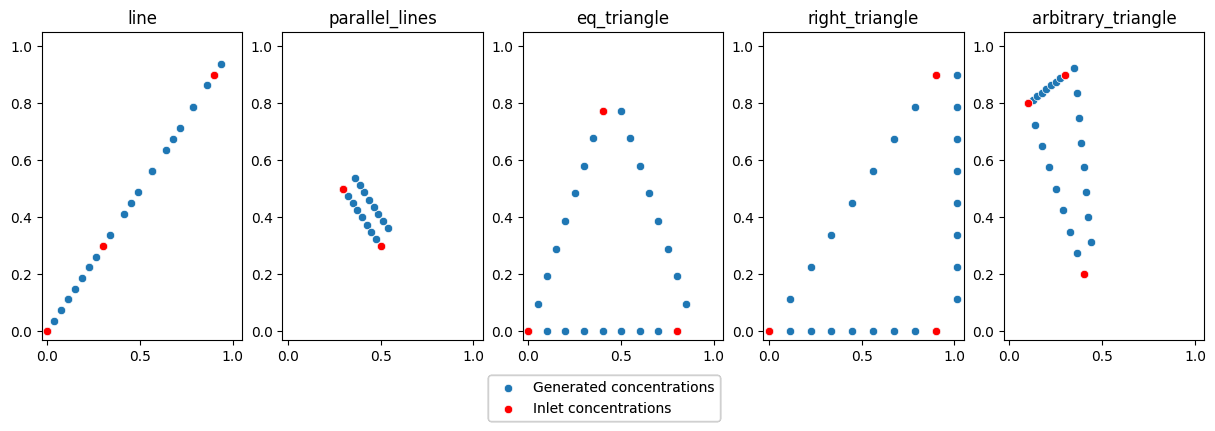

In [49]:


simple_shapes = {
"line":[[0,0],[0.3,0.3],[0.9,0.9]],
"parallel_lines":[[0.3,0.5],[0.5,0.3],[0.3,0.5]],
"eq_triangle":[[0,0],[0.8,0],[0.4,np.sqrt(3*0.8)/2]],
"right_triangle":[[0,0],[0.9,0],[0.9,0.9]],
"arbitrary_triangle" : [[0.1, 0.8],[0.3, 0.9],[0.4, 0.2]]
}


from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, len(simple_shapes), figsize=(15,4))
for i, (name, sol) in enumerate(simple_shapes.items()):
        ax = axes[i]
        
        coords = spiral_mixer(*sol)
        ax.set_title(name)
        sns.scatterplot(x=coords[:,0], y=coords[:,1], ax=ax, label="Generated concentrations")
        sol_array = np.array(sol)
        sns.scatterplot(x=sol_array[:,0], y=sol_array[:,1], ax=ax, color='red', label="Inlet concentrations")
        ax.set_xlim(-0.03,1.05)
        ax.set_ylim(-0.03,1.05)
        ax.set_xlim(-0.03,1.05)
        ax.set_ylim(-0.03,1.05)

        # Remove individual legends
        for ax in axes.flat:
                if ax.get_legend():
                        ax.get_legend().remove()

        # Add single legend to the right
        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.04))

plt.savefig("latex/img/spiral_mixer_shapes.png", bbox_inches='tight')